# House Prices: Advanced Regression Techniques - Kaggle
# Data Analysis and Visualization

### Importing the libraries

In [81]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr

### Import the datasets

In [82]:
# import the datasets
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

In [83]:
test_data = pd.read_csv('./Data/test.csv')

### Basic informations about the data

In [84]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [86]:
# Categorical variables 
train_data.dtypes[train_data.dtypes == "object"].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [87]:
# Numerical variables
train_data.dtypes[train_data.dtypes != "object"].index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [88]:
# Check for duplicates
train_data.drop_duplicates(subset=None, keep='first', inplace=True);

#### Histogram of numeric quantities

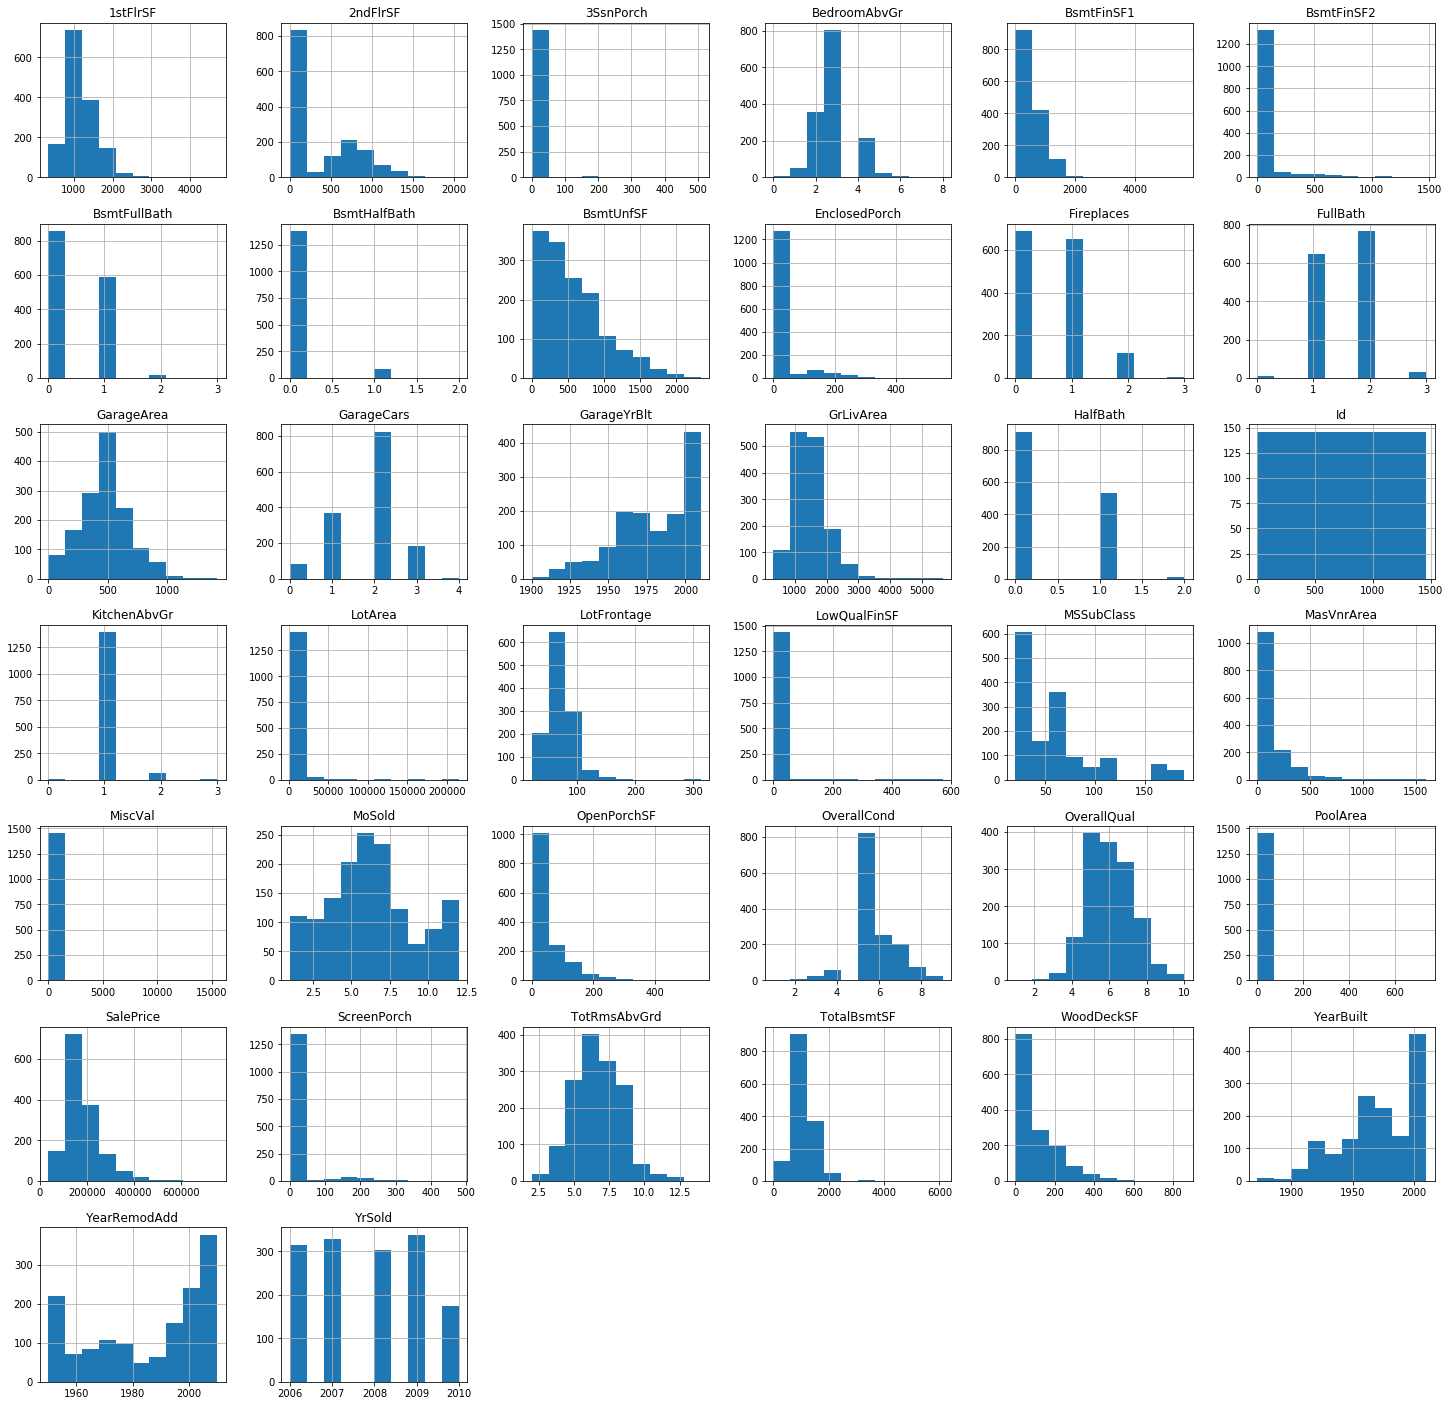

In [89]:
train_data.hist(figsize=(25,25));

Some numerical variables are essentially categorical variables. Lots of skewness in the distributions. Most importantly the target variable 'SalePrice' is also skewed. Checking in more detail.


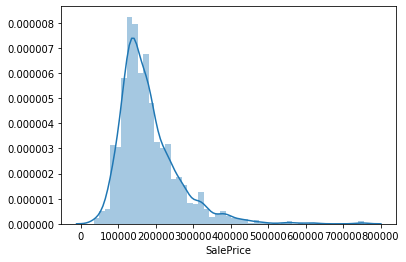

In [90]:
sns.distplot(train_data['SalePrice']);

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. The skewness for a normal distribution = 0

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.
The kurtosis for a standard normal distribution = 3

In [91]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [92]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Exploring categorical variables

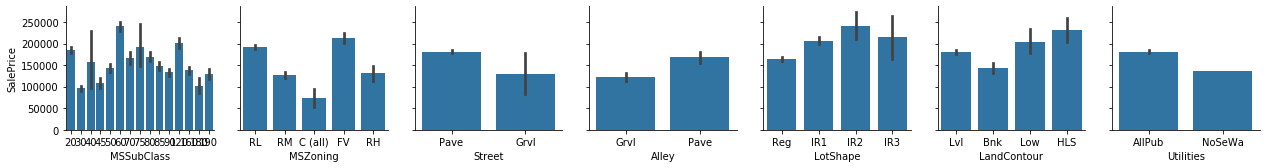

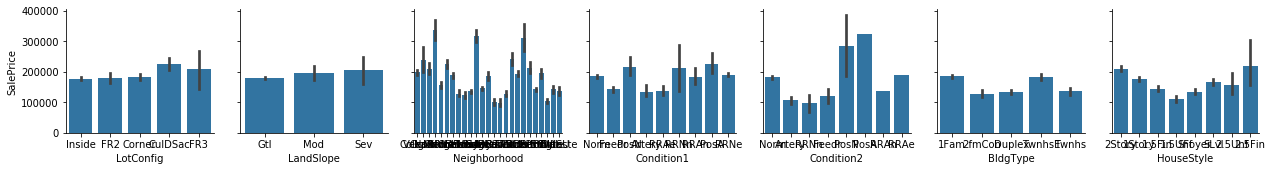

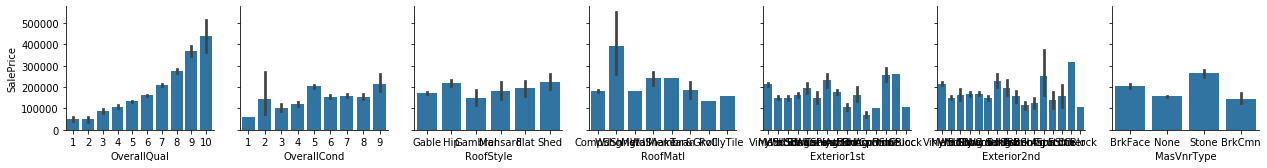

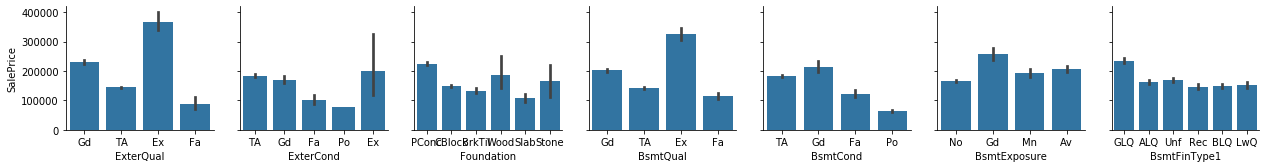

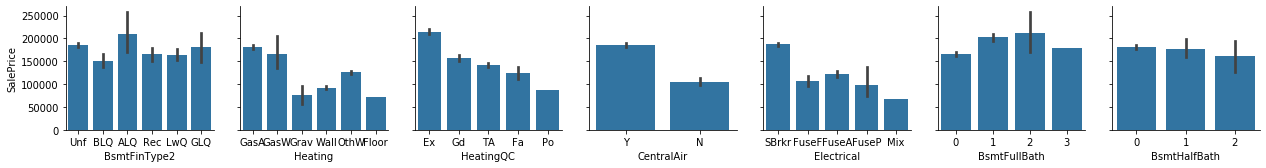

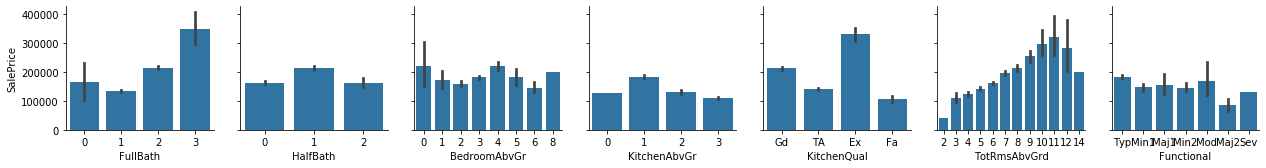

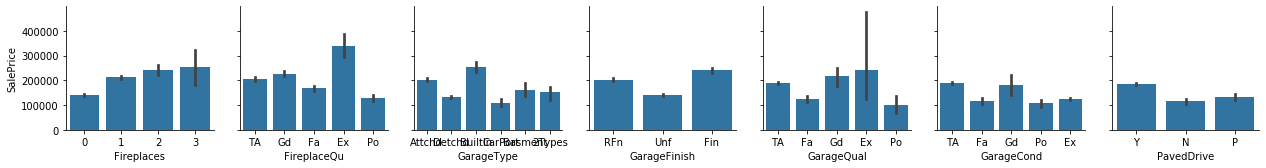

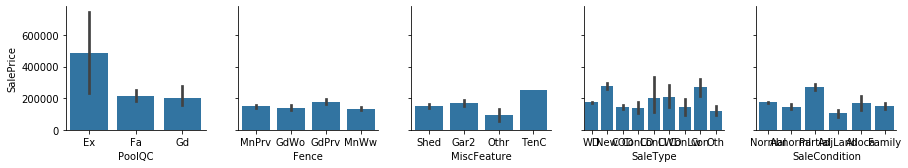

In [93]:
cat_fch1 = ['MSSubClass', 'MSZoning', 'Street', 'Alley','LotShape','LandContour','Utilities']
cat_fch2 = ['LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle']
cat_fch3 = ['OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType']
cat_fch4 = ['ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']
cat_fch5 = ['BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath']
cat_fch6 = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional'] 
cat_fch7 = ['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive']
cat_fch8 = ['PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

g1 = sns.PairGrid(train_data,
                 x_vars = cat_fch1,
                 y_vars=["SalePrice"])
g2 = sns.PairGrid(train_data,
                 x_vars = cat_fch2,
                 y_vars=["SalePrice"])
g3 = sns.PairGrid(train_data,
                 x_vars = cat_fch3,
                 y_vars=["SalePrice"])
g4 = sns.PairGrid(train_data,
                 x_vars = cat_fch4,
                 y_vars=["SalePrice"])
g5 = sns.PairGrid(train_data,
                 x_vars = cat_fch5,
                 y_vars=["SalePrice"])
g6 = sns.PairGrid(train_data,
                 x_vars = cat_fch6,
                 y_vars=["SalePrice"])
g7 = sns.PairGrid(train_data,
                 x_vars = cat_fch7,
                 y_vars=["SalePrice"])
g8 = sns.PairGrid(train_data,
                 x_vars = cat_fch8,
                 y_vars=["SalePrice"])

g1.map(sns.barplot)
g2.map(sns.barplot)
g3.map(sns.barplot)
g4.map(sns.barplot)
g5.map(sns.barplot)
g6.map(sns.barplot)
g7.map(sns.barplot)
g8.map(sns.barplot)

### Correlations

In [94]:
corr_matrix = train_data.corr()

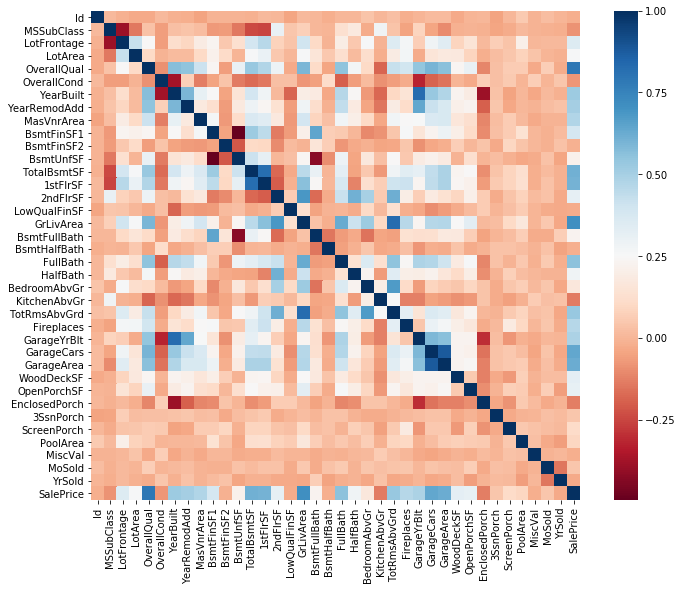

In [95]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, cmap="RdBu", square=True)

Very strong correlations (~ 1) between 'TotalBsmtSF' and '1stFlrSF'. Perhaps  indicates multicollinearity.
Another strong correlation between 'GarageCars' & 'GarageArea'. This is likely since larger garage area means more cars.

In [96]:
# Finding highest correlations pairs
c = corr_matrix.abs()
s = c.unstack()
so = s.sort_values(ascending=False)

In [97]:
so[so.between(0.8,0.99)]

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
TotalBsmtSF   1stFlrSF        0.819530
dtype: float64

The high values of correlation indicated multi-collinearity. Should remove one variable in regression models. For Random forest don't bother.

The above is the pearson correlation which works only for numerica variable.
To explore correlation of non-numeric we should use other method (spearman)

In [98]:
# Define general correlation function for both numeric and categorical

def correlation_total(threshold):
    for i in train_data.columns:
        for j in train_data.columns:
            if train_data[i].dtype != 'object' and train_data[j].dtype != 'object': # if numerical
                if abs(pearsonr(train_data[i], train_data[j])[0]) >= threshold:
                    yield (pearsonr(train_data[i], train_data[j])[0], i, j)
                    
            else:
                if abs(spearmanr(train_data[i], train_data[j])[0]) >= threshold:
                    yield (spearmanr(train_data[i], train_data[j])[0], i, j)

 Require to clean up data before applying

Correlations with respect to target variable 'SalePrice'


In [99]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Strange that overall condition has negative correlation with sale price

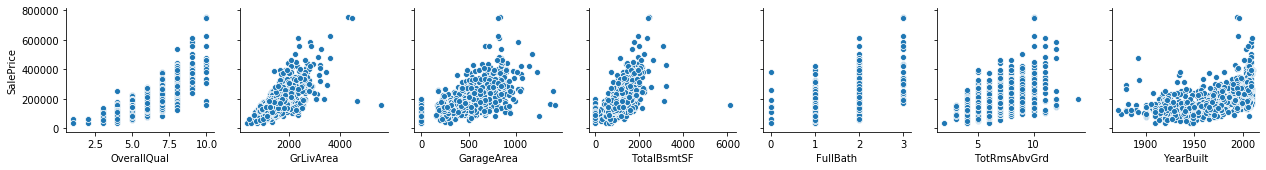

In [100]:
# Scatterplot for top correlated variable with respect to the SalePrice
num_var1 = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
g1 = sns.PairGrid(train_data,
                 x_vars = num_var1,
                 y_vars=["SalePrice"])
g1.map(sns.scatterplot)

## Data Preprocessing 

#### Outliers

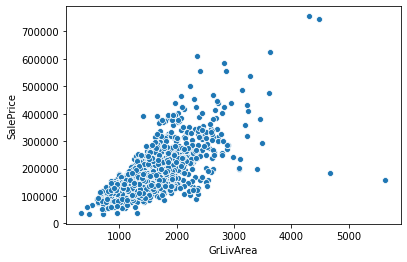

In [101]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data);

Two plots with GrLivArea > 4000 and SalePrice < 20000 are definitely outliers and should be removed. According to the author of the dataset we should remove all datas with  GrLivArea > 4000
Ref : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

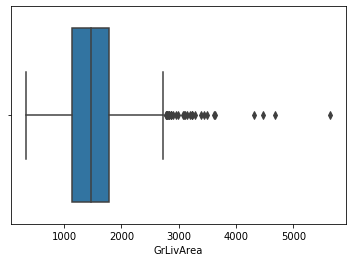

In [102]:
sns.boxplot(x=train_data["GrLivArea"])

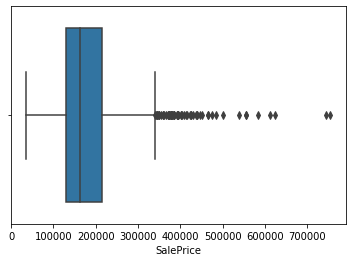

In [103]:
sns.boxplot(x=train_data["SalePrice"])

In [104]:
train_data_pro = train_data.drop(train_data[(train_data['GrLivArea']>4500)].index) # train_data processed

#### Normalize Sale price 

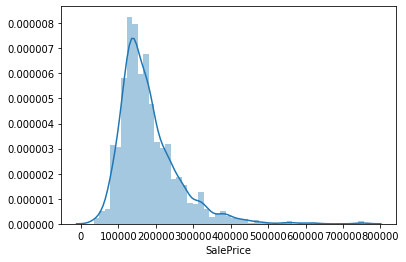

In [105]:
sns.distplot(train_data_pro['SalePrice'])

To normalize the skewness of the saleprice we use log transformation. Use numpy fuction log1p which  applies log(1+x) to all elements of the columns

In [106]:
train_data_pro['SalePrice'] = np.log1p(train_data_pro['SalePrice'])

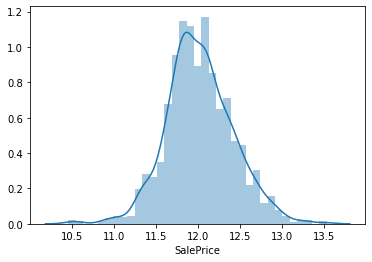

In [107]:
sns.distplot(train_data_pro['SalePrice']);

Now it looks lot more normal

#### Missing values

In [108]:
# Numerical variables
train_data_pro.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

'MSSubClass'  is a categorical (nominal) variable -> Convert to string <br>
'OverallQual', 'OverallCond are ordinal variable -> no change

In [109]:
# convert MSSubClass to string
train_data_pro['MSSubClass'] = train_data_pro.MSSubClass.astype(str)

**Filling missing value strategy** <br>
Numeric variable -> Median value <br>
Categorical variable -> Mode ( most common value)

In [110]:
# Numeric categorical
# OverallQual
mode = train_data_pro['OverallQual'].mode()[0]
train_data_pro['OverallQual'].fillna(mode,inplace=True)                      

In [111]:
# 'OverallCond'
mode = train_data_pro['OverallCond'].mode()[0]
train_data_pro['OverallCond'].fillna(mode,inplace=True) 

In [112]:
# Number of missing values and column names
train_data_pro.isnull().sum()[train_data_pro.isnull().sum()>0]

LotFrontage      259
Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

Note that in columns Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature NA represnts a legitimate value and not a null value. <br>
Column with actual missing values: LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt

In [113]:
# Numerical columns with missing values
train_data_pro.select_dtypes(exclude=['object']).isnull().sum()[train_data_pro.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [114]:
# Fill numerical missing datas with median
# LotFrontage 
med = train_data_pro['LotFrontage'].median()
train_data_pro['LotFrontage'].fillna(med, inplace = True)
# MasVnrArea 
med = train_data_pro['MasVnrArea'].median()
train_data_pro['MasVnrArea'].fillna(med, inplace = True)
# GarageYrBlt
med = train_data_pro['MasVnrArea'].median()
train_data_pro['GarageYrBlt'].fillna(med, inplace = True)

In [115]:
# Categorical columns with missing values
train_data_pro.select_dtypes(include=['object']).isnull().sum()[train_data_pro.isnull().sum()>0]

Alley           1367
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

In [116]:
# Fill categorical columns with actual missing values with most common value (mode)
#MasVnrType
mode = train_data_pro['MasVnrType'].mode()[0]
train_data_pro['MasVnrType'].fillna(mode, inplace = True)
#Electrical
mode = train_data_pro['Electrical'].mode()[0]
train_data_pro['Electrical'].fillna(mode, inplace = True)

Note that we use mode[0] since .mode() returns a series which fillna cannot use. .mode()[0] returns the mode value

In [117]:
# Remaining categorical columns with NA which are actual values
# Fill with string 'none'
train_data_pro.fillna('none', inplace = True)

#### Cleaning test data 

In [118]:
# Missing datas in columns
test_data.isnull().sum()[test_data.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [119]:
# convert MSSubClass to string
test_data['MSSubClass'] = test_data.MSSubClass.astype(str)

In [120]:
# Numerical columns with missing values
test_data.select_dtypes(exclude=['object']).isnull().sum()[test_data.isnull().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [121]:
# Fill numerical missing data with median for test data
med = test_data['LotFrontage'].median()
test_data['LotFrontage'].fillna(med, inplace = True)
med = test_data['MasVnrArea'].median()
test_data['MasVnrArea'].fillna(med, inplace = True)
med = test_data['BsmtFinSF1'].median()
test_data['BsmtFinSF1'].fillna(med, inplace = True)
med = test_data['BsmtFinSF2'].median()
test_data['BsmtFinSF2'].fillna(med, inplace = True)
med = test_data['TotalBsmtSF'].median()
test_data['TotalBsmtSF'].fillna(med, inplace = True)
med = test_data['GarageYrBlt'].median()
test_data['GarageYrBlt'].fillna(med, inplace = True)
med = test_data['GarageArea'].median()
test_data['GarageArea'].fillna(med, inplace = True)
med = test_data['BsmtUnfSF'].median()
test_data['BsmtUnfSF'].fillna(med, inplace = True)

In [122]:
# Fill numerical categorical data with mode
mode = test_data['BsmtFullBath'].mode()[0]
test_data['BsmtFullBath'].fillna(mode, inplace = True)
mode = test_data['BsmtHalfBath'].mode()[0]
test_data['BsmtHalfBath'].fillna(mode, inplace = True)
mode = test_data['GarageCars'].mode()[0]
test_data['GarageCars'].fillna(mode, inplace = True)

Categorical with actual mising data: Utilities, Exterior1st, Exterior2nd, MasVnrType, KitchenQual, Functional, SaleType 

In [123]:
# Filling categorical variable with mode for test data
mode = test_data['Utilities'].mode()[0]
test_data['Utilities'].fillna(mode, inplace = True)
mode = test_data['Exterior1st'].mode()[0]
test_data['Exterior1st'].fillna(mode, inplace = True)
mode = test_data['Exterior2nd'].mode()[0]
test_data['Exterior2nd'].fillna(mode, inplace = True)
mode = test_data['MasVnrType'].mode()[0]
test_data['MasVnrType'].fillna(mode, inplace = True)
mode = test_data['KitchenQual'].mode()[0]
test_data['KitchenQual'].fillna(mode, inplace = True)
mode = test_data['Functional'].mode()[0]
test_data['Functional'].fillna(mode, inplace = True)
mode = test_data['SaleType'].mode()[0]
test_data['SaleType'].fillna(mode, inplace = True)

In [124]:
# Filling the rest legimitimate NA with 'none'
test_data.fillna('none', inplace = True)

In [125]:
#saving cleaned data to csv
#train_data_enc.to_csv(r'./Data/train_data_cleaned.csv')

In [126]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

### Level Encoding categorical variable

#### For ordinal variable -> Categories are Ordered -> Ordered numerical levels 

Ordinal variable -> LotShape, LandContour, Utilities,LandSlope,ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu,GarageFinish,GarageQual, GarageCond, PavedDrive, PoolQC, Fence, Street, Alley

In [127]:
train_data_pro['PavedDrive'].value_counts()

Y    1338
N      90
P      30
Name: PavedDrive, dtype: int64

In [128]:
# Replacing ordinal categorical variable with numbers
train_data_enc = train_data_pro.replace({"LotShape": {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                          "LandContour":{"Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4},
                                          "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                          "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                                          "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                          "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                          "BsmtCond" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "BsmtQual" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "BsmtExposure" : {"none" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                                          "BsmtFinType1" : {"none" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                          "BsmtFinType2" : {"none" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                          "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                          "FireplaceQu" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "GarageFinish" : {"none" : 0, "Unf" : 1, "RFn" : 2,  "Fin": 3},
                                           "GarageQual" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "GarageCond" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                                           "PoolQC" : {"none" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                                           "Fence" : {"none" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4},
                                           "Street" : {"Grvl" : 1, "Pave" : 2},
                                           "Alley" : {"none" : 0, "Grvl" : 1, "Pave" : 2},
                                           })

In [129]:
# Converting ordinal columns into integers
train_data_enc['LotShape'].astype(str).astype(int)
train_data_enc['LandContour'].astype(str).astype(int)
train_data_enc['LandSlope'].astype(str).astype(int)
train_data_enc['Utilities'].astype(str).astype(int)
train_data_enc['ExterCond'].astype(str).astype(int)
train_data_enc['ExterQual'].astype(str).astype(int)
train_data_enc['BsmtCond'].astype(str).astype(int)
train_data_enc['BsmtQual'].astype(str).astype(int)
train_data_enc['BsmtExposure'].astype(str).astype(int)
train_data_enc['BsmtFinType1'].astype(str).astype(int)
train_data_enc['BsmtFinType2'].astype(str).astype(int)
train_data_enc['HeatingQC'].astype(str).astype(int)
train_data_enc['KitchenQual'].astype(str).astype(int)
train_data_enc['Functional'].astype(str).astype(int)
train_data_enc['FireplaceQu'].astype(str).astype(int)
train_data_enc['GarageFinish'].astype(str).astype(int)
train_data_enc['GarageQual'].astype(str).astype(int)
train_data_enc['GarageCond'].astype(str).astype(int)
train_data_enc['PavedDrive'].astype(str).astype(int)
train_data_enc['PoolQC'].astype(str).astype(int)
train_data_enc['Fence'].astype(str).astype(int)
train_data_enc['Street'].astype(str).astype(int)
train_data_enc['Alley'].astype(str).astype(int);

In [130]:
# Replacing ordinal categorical variable with numbers for test data_set
test_data = test_data.replace({"LotShape": {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                          "LandContour":{"Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4},
                                          "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                          "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                                          "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                          "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                          "BsmtCond" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "BsmtQual" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "BsmtExposure" : {"none" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                                          "BsmtFinType1" : {"none" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                          "BsmtFinType2" : {"none" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                          "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                          "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                          "FireplaceQu" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "GarageFinish" : {"none" : 0, "Unf" : 1, "RFn" : 2,  "Fin": 3},
                                           "GarageQual" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "GarageCond" : {"none" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                                           "PoolQC" : {"none" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                                           "Fence" : {"none" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4},
                                           "Street" : {"Grvl" : 1, "Pave" : 2},
                                           "Alley" : {"none" : 0, "Grvl" : 1, "Pave" : 2},
                                           })

In [131]:
# Converting ordinal columns into integers for test data
test_data['LotShape'].astype(str).astype(int)
test_data['LandContour'].astype(str).astype(int)
test_data['LandSlope'].astype(str).astype(int)
test_data['Utilities'].astype(str).astype(int)
test_data['ExterCond'].astype(str).astype(int)
test_data['ExterQual'].astype(str).astype(int)
test_data['BsmtCond'].astype(str).astype(int)
test_data['BsmtQual'].astype(str).astype(int)
test_data['BsmtExposure'].astype(str).astype(int)
test_data['BsmtFinType1'].astype(str).astype(int)
test_data['BsmtFinType2'].astype(str).astype(int)
test_data['HeatingQC'].astype(str).astype(int)
test_data['KitchenQual'].astype(str).astype(int)
test_data['Functional'].astype(str).astype(int)
test_data['FireplaceQu'].astype(str).astype(int)
test_data['GarageFinish'].astype(str).astype(int)
test_data['GarageQual'].astype(str).astype(int)
test_data['GarageCond'].astype(str).astype(int)
test_data['PavedDrive'].astype(str).astype(int)
test_data['PoolQC'].astype(str).astype(int)
test_data['Fence'].astype(str).astype(int)
test_data['Street'].astype(str).astype(int)
test_data['Alley'].astype(str).astype(int);

### Feature engineering 

In [132]:
train_data_feng = train_data_enc # Data with feature engineering

In [133]:
# Define general correlation function for both numeric and categorical

def correlation_total(dataframe, lower_threshold, upper_threshold):
    for i in dataframe.columns:
        for j in dataframe.columns:
            if dataframe[i].dtype != 'object' and dataframe[j].dtype != 'object': # if numerical
                if (abs(pearsonr(dataframe[i], dataframe[j])[0]) >= lower_threshold) and (abs(pearsonr(dataframe[i], dataframe[j])[0]) <= upper_threshold):
                    yield (pearsonr(dataframe[i], dataframe[j])[0], i, j)
                    
            else:
                if (abs(spearmanr(dataframe[i], dataframe[j])[0]) >= lower_threshold) and (abs(spearmanr(dataframe[i], dataframe[j])[0]) <= upper_threshold):
                    yield (spearmanr(dataframe[i], dataframe[j])[0], i, j)

In [134]:
# General correlations > 0.8 but not the same features
list(correlation_total(train_data_pro, 0.8, 0.99))

[(0.8214046894649683, 'OverallQual', 'SalePrice'),
 (0.8582289536590632, 'Exterior1st', 'Exterior2nd'),
 (0.858228953659063, 'Exterior2nd', 'Exterior1st'),
 (-0.9019258235769831, 'BsmtFinType2', 'BsmtFinSF2'),
 (-0.901925823576983, 'BsmtFinSF2', 'BsmtFinType2'),
 (0.8038296279256132, 'TotalBsmtSF', '1stFlrSF'),
 (0.8038296279256132, '1stFlrSF', 'TotalBsmtSF'),
 (0.8294981976715325, 'GrLivArea', 'TotRmsAbvGrd'),
 (0.8294981976715325, 'TotRmsAbvGrd', 'GrLivArea'),
 (-0.8933654220072471, 'Fireplaces', 'FireplaceQu'),
 (-0.8933654220072471, 'FireplaceQu', 'Fireplaces'),
 (0.8873044983919187, 'GarageCars', 'GarageArea'),
 (0.8873044983919187, 'GarageArea', 'GarageCars'),
 (0.8099691212359648, 'GarageQual', 'GarageCond'),
 (0.8099691212359648, 'GarageCond', 'GarageQual'),
 (-0.9797876503728653, 'MiscFeature', 'MiscVal'),
 (-0.9797876503728652, 'MiscVal', 'MiscFeature'),
 (0.8214046894649683, 'SalePrice', 'OverallQual')]

In [135]:
# Bedroom Ratio
train_data_feng['BedroomRatio'] = train_data_feng['BedroomAbvGr']/train_data_feng['TotRmsAbvGrd']
# Average bedroom size
train_data_feng['AvgRoomSize'] = train_data_feng['GrLivArea']/train_data_feng['TotRmsAbvGrd']

 Combine Quality & Conditions in the attributes

In [136]:
# Garage 
train_data_feng['GarageScore'] = train_data_feng['GarageQual'] * train_data_feng['GarageCond']
# Overall
train_data_feng['OverallScore'] = train_data_feng['OverallQual'] * train_data_feng['OverallCond']
# Exterior
train_data_feng['ExterScore'] = train_data_feng['ExterQual'] * train_data_feng['ExterCond']
# Basement
train_data_feng['BsmtScore1'] = train_data_feng['BsmtQual'] * train_data_feng['BsmtCond']
train_data_feng['BsmtScore2'] = train_data_feng['BsmtQual'] * train_data_feng['BsmtCond'] * train_data_feng['BsmtExposure']

# Combine quality and quantity
# Kitchen
train_data_feng['KitchenScore'] = train_data_feng['KitchenQual'] * train_data_feng['KitchenAbvGr']
# Fireplace
train_data_feng['FireplaceScore'] = train_data_feng['FireplaceQu'] * train_data_feng['Fireplaces']
# Pool
train_data_feng['PoolScore'] = train_data_feng['PoolArea'] * train_data_feng['PoolQC']
# Basement type
train_data_feng['BsmtFin1Score'] = train_data_feng['BsmtFinSF1'] * train_data_feng['BsmtFinType1']
train_data_feng['BsmtFin2Score'] = train_data_feng['BsmtFinSF1'] * train_data_feng['BsmtFinType1']
# 1st floor + 2nd floor area
train_data_feng['TotFlrSF'] = train_data_feng['1stFlrSF'] + train_data_feng['2ndFlrSF']
# Total bath
train_data_feng['TotBath'] = train_data_feng['FullBath'] + 0.5*train_data_feng['HalfBath']
# Total Basement Bath
train_data_feng['TotBsmtBath'] = train_data_feng['BsmtFullBath'] + 0.5*train_data_feng['BsmtHalfBath']
# Total Baths combined
train_data_feng['TotCombBath'] = train_data_feng['FullBath'] + 0.5*train_data_feng['HalfBath'] + train_data_feng['BsmtFullBath'] + 0.5*train_data_feng['BsmtHalfBath']
# Total Surface Area (House SF + Basement SF)
train_data_feng['TotSF'] = train_data_feng['GrLivArea'] + train_data_feng['TotalBsmtSF']

#### Identical Feature engineering for test set 

In [137]:
# Feature combination for test dataset
# Bedroom Ratio
test_data['BedroomRatio'] = test_data['BedroomAbvGr']/test_data['TotRmsAbvGrd']
# Average bedroom size
test_data['AvgRoomSize'] = test_data['GrLivArea']/test_data['TotRmsAbvGrd']
# Garage 
test_data['GarageScore'] = test_data['GarageQual'] * test_data['GarageCond']
# Overall
test_data['OverallScore'] = test_data['OverallQual'] * test_data['OverallCond']
# Exterior
test_data['ExterScore'] = test_data['ExterQual'] * test_data['ExterCond']
# Basement
test_data['BsmtScore1'] = test_data['BsmtQual'] * test_data['BsmtCond']
test_data['BsmtScore2'] = test_data['BsmtQual'] * test_data['BsmtCond'] * test_data['BsmtExposure']

# Combine quality and quantity
# Kitchen
test_data['KitchenScore'] = test_data['KitchenQual'] * test_data['KitchenAbvGr']
# Fireplace
test_data['FireplaceScore'] = test_data['FireplaceQu'] * test_data['Fireplaces']
# Pool
test_data['PoolScore'] = test_data['PoolArea'] * test_data['PoolQC']
# Basement type
test_data['BsmtFin1Score'] = test_data['BsmtFinSF1'] * test_data['BsmtFinType1']
test_data['BsmtFin2Score'] = test_data['BsmtFinSF1'] * test_data['BsmtFinType1']
# 1st floor + 2nd floor area
test_data['TotFlrSF'] = test_data['1stFlrSF'] + test_data['2ndFlrSF']
# Total bath
test_data['TotBath'] = test_data['FullBath'] + 0.5*test_data['HalfBath']
# Total Basement Bath
test_data['TotBsmtBath'] = test_data['BsmtFullBath'] + 0.5*test_data['BsmtHalfBath']
# Total Baths combined
test_data['TotCombBath'] = test_data['FullBath'] + 0.5*test_data['HalfBath'] + test_data['BsmtFullBath'] + 0.5*test_data['BsmtHalfBath']
# Total Surface Area (House SF + Basement SF)
test_data['TotSF'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']

In [138]:
#saving data to csv
#train_data_feng.to_csv(r'./train_data_feng.csv')

### Encoding categorical variable
#### One-hot encoding

We must ensure that the training set and the test set have same columns after One-hot encoding.
We can add the two set then perform OHE but that might lead to data leakage
So instead we use the align command.
The align command makes sure the columns show up in the same order in both datasets (it uses column names to identify which columns line up in each dataset.) The argument join='left' specifies that we will do the equivalent of SQL's left join.

In [139]:
# Create the X, y matrices
# All possible features (all columns)
X = train_data_feng.loc[:, train_data_feng.columns != 'SalePrice']
y = train_data_feng['SalePrice']
Xt = test_data

In [140]:
X_ohe = pd.get_dummies(train_data_feng)
Xt = pd.get_dummies(Xt)
X_final, Xtest_final = X_ohe.align(Xt, join='left', axis=1)

In [141]:
# Due to the align command, there are additional columns in test data (extra category of training) which have NA values. These are filled with 0.
Xtest_final.fillna(0, inplace = True)

In [142]:
#X_final.to_csv(r'./X_final.csv')

### Feature Scaling

Standardization -> subtract mean value then divide by standard deviation

In [143]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
sf = std_sc.fit_transform(X_final.values) # feature scaled (return numpy array)
X_final_sc = pd.DataFrame(sf, index=X_final.index, columns=X_final.columns) # convert back to dataframe
Xtest_final_sc = std_sc.fit_transform(Xtest_final) # feature scaled test set 

## Training different ML model for regression
### Linear regression

In [144]:
from sklearn.linear_model import LinearRegression
LR_reg = LinearRegression()
LR_reg.fit(X_final,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
#predicting training set
y_pred_LR = LR_reg.predict(X_final)

In [146]:
# compare y with predicted y for training set (Log SalePrice)
print(np.c_[y, y_pred_LR])

[[12.24769912 12.24769912]
 [12.10901644 12.10901644]
 [12.31717117 12.31717117]
 ...
 [12.49313327 12.49313327]
 [11.86446927 11.86446927]
 [11.90159023 11.90159023]]


#### Evaluation

Evaluation measure -> root mean square error

In [147]:
# Calculating root mean squared error
from sklearn.metrics import mean_squared_error
LR_mse = mean_squared_error(y,y_pred_LR) # mean square error
LR_rmse = np.sqrt(LR_mse) # root mean square error 
LR_rmse

1.5985360229624892e-13

In [148]:
# For actualy values and not log. 
LR_mse = mean_squared_error(np.expm1(y),np.expm1(y_pred_LR)) # mean square error
LR_rmse = np.sqrt(LR_mse) # root mean square error 
LR_rmse

3.020721074446756e-08

#### Analyzing coefficients

In [149]:
fcoeff = pd.DataFrame(LR_reg.coef_, index = X_final.columns, columns=['Coefficient'])
# Top 10 coefficients (absolute values)
fcoeff.abs().sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
SalePrice,1.000000e+00
RoofStyle_Shed,4.292836e-13
HouseStyle_2.5Fin,3.942262e-13
Condition2_RRAe,3.532482e-13
RoofMatl_Roll,3.258469e-13
BsmtScore2_80,3.246744e-13
RoofMatl_Metal,3.105320e-13
BsmtScore2_4,3.080859e-13
Heating_Floor,2.971502e-13
Condition2_PosN,2.873378e-13


In [150]:
# print the intercept
print(LR_reg.intercept_)

1.1798562127296464e-11


#### K-Fold Cross verification

In [151]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(LR_reg, X = X_final, y = y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_score = np.sqrt(-score)

In [152]:
LR_rmse_score

array([3.70710201e-14, 2.18007472e-12, 1.14025199e-13, 1.06634475e-12,
       4.38461226e-12, 1.57155639e-13, 1.70340044e-13, 1.18389196e-12,
       1.42292648e-13, 8.81031991e-14])

In [153]:
LR_rmse_score.mean()

9.523911444036823e-13

Too low value of error. Must be some issue (overfitting, multicolinearity etc)

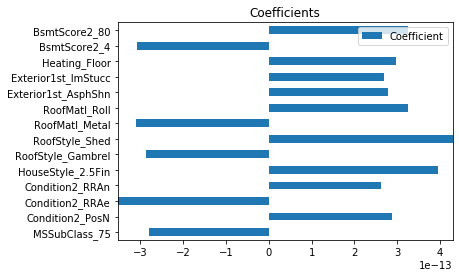

In [154]:
# Plot important coefficients
fcoeff1 =  fcoeff[(fcoeff['Coefficient'].abs() > 2.5e-13) & (fcoeff['Coefficient'].abs() < 0.99) ]
fcoeff1.plot(kind = "barh")
plt.title("Coefficients")
plt.show()

GarageType none has maximum coefficient is counterintuitive. Not sure if this is correct.

#### Try With feature scaling 

In [155]:
#predicting training set with feature scaling
from sklearn.linear_model import LinearRegression
LR_reg = LinearRegression()
LR_reg.fit(X_final_sc,y)
y_pred_LR_sc = LR_reg.predict(X_final_sc)

In [156]:
# compare y with predicted y for training set (Log SalePrice)
print(np.c_[y, y_pred_LR,y_pred_LR_sc ])

[[12.24769912 12.24769912 12.24769912]
 [12.10901644 12.10901644 12.10901644]
 [12.31717117 12.31717117 12.31717117]
 ...
 [12.49313327 12.49313327 12.49313327]
 [11.86446927 11.86446927 11.86446927]
 [11.90159023 11.90159023 11.90159023]]


Looks similar

In [157]:
# Calculating root mean squared error
from sklearn.metrics import mean_squared_error
LR_mse_sc = mean_squared_error(y,y_pred_LR_sc) # mean square error
LR_rmse_sc = np.sqrt(LR_mse_sc) # root mean square error 
LR_rmse_sc

2.1394721440079834e-15


#### K-fold verification with feature scaling

In [158]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(LR_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_score = np.sqrt(-score)

In [159]:
LR_rmse_score

array([5.21191287e-04, 8.17148420e-05, 6.14336911e-04, 9.13247011e-07,
       2.44843011e-04, 1.24003398e-05, 2.53651790e-03, 6.52317378e-06,
       6.13538713e-04, 2.75092813e-04])

In [160]:
LR_rmse_score.mean()

0.0004907072235665237

Linear Regression with Feature Scaling k-fold validation has higher error than training -> indicates overfitting
<br>Let's now try Linear Regression with Regularization

## Linear Regression with Regularization

### Ridge Regression

In Ridge regression has L2 penalty -> sum of weight square terms are added to the cost function

In [161]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=5, solver='auto')
ridge_reg.fit(X_final_sc, y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [162]:
y_pred_ridge = ridge_reg.predict(X_final_sc)

In [163]:
# compare y with predicted y for training set (Log SalePrice)
print(np.c_[y, y_pred_LR, y_pred_LR_sc, y_pred_ridge ])

[[12.24769912 12.24769912 12.24769912 12.24728433]
 [12.10901644 12.10901644 12.10901644 12.11468021]
 [12.31717117 12.31717117 12.31717117 12.31431303]
 ...
 [12.49313327 12.49313327 12.49313327 12.49640224]
 [11.86446927 11.86446927 11.86446927 11.86566251]
 [11.90159023 11.90159023 11.90159023 11.90225896]]


In [164]:
LR_mse_sc = mean_squared_error(y,y_pred_ridge) # mean square error
LR_rmse_sc = np.sqrt(LR_mse_sc) # root mean square error 
LR_rmse_sc

0.005587351927216121

#### K-fold cross verification for Ridge regression 

In [165]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(ridge_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_score = np.sqrt(-score)
ridge_rmse_score

array([0.00914776, 0.00701744, 0.00839298, 0.00930707, 0.01098735,
       0.00774324, 0.00872152, 0.00636853, 0.0074684 , 0.00935504])

In [166]:
ridge_rmse_score.mean()

0.00845093243475201

K-fold rmse and training rmse for ridge are similar indicating minimal overfitting.

#### Cross-validation

In [167]:
from sklearn.linear_model import  RidgeCV
ridge_cv = RidgeCV(alphas = [ 0.1, 0.5, 1, 3, 10, 30])
ridge_cv.fit(X_final_sc, y)
alpha = ridge_cv.alpha_
# Fine-tuning alpha in the viscinity of alpha
ridge_cv = RidgeCV(alphas = [alpha * 0.5, alpha * 1.5, alpha * 0.75])
ridge_cv.fit(X_final_sc, y)
alpha = ridge_cv.alpha_
print("Best alpha :", alpha)

Best alpha : 0.05


In [168]:
# Applying k-Fold Cross Validation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.05)
from sklearn.model_selection import cross_val_score
score = cross_val_score(ridge_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_score = np.sqrt(-score)
ridge_rmse_score

array([1.02558603e-04, 7.69370165e-05, 9.43034227e-05, 1.02778262e-04,
       1.24843537e-04, 8.66822894e-05, 9.69085665e-05, 6.94590988e-05,
       8.64417824e-05, 1.04058812e-04])

In [169]:
ridge_rmse_score.mean()

9.449713897801407e-05

##### Ridge Coefficients

In [170]:
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_final_sc, y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [171]:
# Note - coefficients can only be obtained after fit.
ridge_coeff = pd.DataFrame(ridge_reg.coef_, index = X_final_sc.columns, columns=['Coefficient'])
# Top 10 coefficients (absolute values)
ridge_coeff.abs().sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
SalePrice,0.399311
GarageYrBlt,0.000070
BsmtExposure,0.000062
GarageType_none,0.000053
TotRmsAbvGrd,0.000043
BsmtScore2_48,0.000039
YearBuilt,0.000038
BsmtScore2_9,0.000035
PoolScore,0.000034
BsmtScore2_36,0.000031


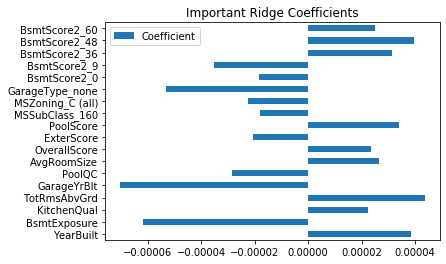

In [172]:
# Plot important coefficients
imp_ridge_coeff =  ridge_coeff[(ridge_coeff['Coefficient'].abs() > 1.8e-5) & (ridge_coeff['Coefficient'].abs() < 0.3) ]
imp_ridge_coeff.plot(kind = "barh")
plt.title("Important Ridge Coefficients")
plt.show()

### Lasso Regression

In lasso regression the L1 norm is used as penalty in the cost function

In [173]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_final_sc, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
y_pred_lasso = lasso_reg.predict(X_final_sc)

In [175]:
# compare y with predicted y for training set (Log SalePrice)
print(np.c_[y, y_pred_LR, y_pred_LR_sc, y_pred_ridge, y_pred_lasso ])

[[12.24769912 12.24769912 12.24769912 12.24728433 12.19171875]
 [12.10901644 12.10901644 12.10901644 12.11468021 12.08774356]
 [12.31717117 12.31717117 12.31717117 12.31431303 12.24380435]
 ...
 [12.49313327 12.49313327 12.49313327 12.49640224 12.37572922]
 [11.86446927 11.86446927 11.86446927 11.86566251 11.90439809]
 [11.90159023 11.90159023 11.90159023 11.90225896 11.93222896]]


In [176]:
LR_mse_sc = mean_squared_error(y,y_pred_lasso) # mean square error
LR_rmse_sc = np.sqrt(LR_mse_sc) # root mean square error 
LR_rmse_sc

0.10000000000000005

#### K-fold cross verification for Lasso regression 

In [177]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lasso_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_score = np.sqrt(-score)
lasso_rmse_score

array([0.09370895, 0.09869648, 0.10777414, 0.10829447, 0.11772633,
       0.0880571 , 0.09809406, 0.09165544, 0.09435314, 0.10120562])

In [178]:
lasso_rmse_score.mean()

0.09995657309577248

#### Cross-validation

In [179]:
from sklearn.linear_model import  LassoCV
lasso_cv = LassoCV(alphas = [ 0.001, 0.1, 0.5, 1, 3, 10])
lasso_cv.fit(X_final_sc, y)
alpha = lasso_cv.alpha_
# Fine-tuning alpha in the viscinity of alpha
lasso_cv = LassoCV(alphas = [alpha * 0.5, alpha * 1.5, alpha * 0.75])
lasso_cv.fit(X_final_sc, y)
alpha = lasso_cv.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0005


/home/budhochat/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/budhochat/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [180]:
# Applying k-Fold Cross Validation
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0005)
from sklearn.model_selection import cross_val_score
score = cross_val_score(lasso_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_score = np.sqrt(-score)
lasso_rmse_score

array([0.00046854, 0.00049348, 0.00053887, 0.00054147, 0.00058863,
       0.00044029, 0.00049047, 0.00045828, 0.00047177, 0.00050603])

In [181]:
lasso_rmse_score.mean()

0.0004997828654788814

Lasso score is less than ridge

##### Lasso regression coefficients

In [182]:
lasso_reg = Lasso(alpha=0.0005)
lasso_reg.fit(X_final_sc, y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [183]:
# Note - coefficients can only be obtained after fit.
lasso_coeff = pd.DataFrame(lasso_reg.coef_, index = X_final_sc.columns, columns=['Coefficient'])
# Top 10 coefficients (absolute values)
lasso_coeff.abs().sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
SalePrice,0.399076
Id,0.000000
Exterior2nd_Wd Sdng,0.000000
Exterior2nd_Stucco,0.000000
Exterior2nd_Stone,0.000000
Exterior2nd_Plywood,0.000000
Exterior2nd_Other,0.000000
Exterior2nd_MetalSd,0.000000
Exterior2nd_ImStucc,0.000000
Exterior2nd_HdBoard,0.000000


All zero coefficient. Too much penalty.

In [184]:
from sklearn.linear_model import  LassoCV
lasso_cv = LassoCV(alphas = [1e-30,1e-29,1e-25, 5e-5,1e-4,5e-4], max_iter=5000, tol=0.0001)
lasso_cv.fit(X_final_sc, y)
alpha = lasso_cv.alpha_
# Fine-tuning alpha in the viscinity of alpha
lasso_cv = LassoCV(alphas = [alpha * 0.5, alpha * 1.5, alpha * 0.75])
lasso_cv.fit(X_final_sc, y)
alpha = lasso_cv.alpha_
print("Best alpha :", alpha)

/home/budhochat/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/budhochat/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha : 5e-30


Error not a good sign. Likely model over-fitting or too complicated for lasso

 Lasso not a good model

In [185]:
# Applying k-Fold Cross Validation
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=5e-30)
from sklearn.model_selection import cross_val_score
score = cross_val_score(lasso_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_score = np.sqrt(-score)
lasso_rmse_score

array([0.00315964, 0.00313487, 0.04262426, 0.00398676, 0.00878642,
       0.00543419, 0.00674657, 0.00170119, 0.0051031 , 0.01145321])

In [186]:
lasso_rmse_score.mean()

0.009213021501900258

#### Coefficients

In [187]:
lasso_reg = Lasso(alpha=5e-30)
lasso_reg.fit(X_final_sc, y)

Lasso(alpha=5e-30, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
# Note - coefficients can only be obtained after fit.
lasso_coeff = pd.DataFrame(lasso_reg.coef_, index = X_final_sc.columns, columns=['Coefficient'])
# Top 10 coefficients (absolute values)
lasso_coeff.abs().sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
SalePrice,0.399826
TotFlrSF,0.314651
2ndFlrSF,0.305233
1stFlrSF,0.260724
BsmtQual,0.200627
BsmtCond_0,0.154480
TotSF,0.139521
BsmtScore1_9,0.125271
BsmtScore1_6,0.095247
BsmtFullBath,0.089251


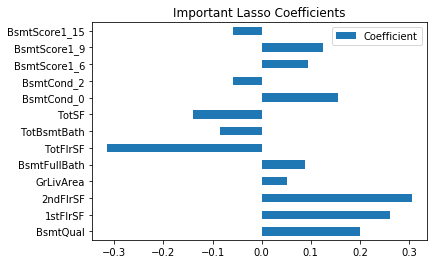

In [189]:
# Plot important coefficients
imp_lasso_coeff =  lasso_coeff[(lasso_coeff['Coefficient'].abs() > 5e-2) & (lasso_coeff['Coefficient'].abs() < 0.35) ]
imp_lasso_coeff.plot(kind = "barh")
plt.title("Important Lasso Coefficients")
plt.show()

Lasso shows positive correlation with 2nd SF but negative with total floor SF which does not make sense.

## Random Forest Regression

In [190]:
np.random.seed(0)
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=100,random_state = 0)
RF_reg.fit(X_final, y) # no need for feature scaling in Random Forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [191]:
#predicting training set
y_pred_RF = RF_reg.predict(X_final)

In [192]:
RF_mse = mean_squared_error(y,y_pred_RF)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

0.004120657782605178

#### Fine-tuning Random Forest regressor

#### Grid Search (finding best parameter)

In [193]:
np.random.seed(0)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 200, 300, 400, 500],'max_features': ['auto', None, 'log2']}]
RF_reg = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=RF_reg, 
                                    param_grid=parameters,
                                    scoring='neg_mean_squared_error', 
                                    cv = 10,
                                    n_jobs = -1,
                                    return_train_score=True)
grid_search.fit(X_final,y)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

In [194]:
print("Best score:", np.sqrt(-best_score))
print("Best Parameters:", best_parameters)

Best score: 0.011878102922173315
Best Parameters: {'max_features': 'auto', 'n_estimators': 500}


#### Fitting the training data with the optimized parameter

In [195]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=200,random_state = 0)
RF_reg.fit(X_final, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [196]:
RF_mse = mean_squared_error(y,y_pred_RF)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

0.004120657782605178

#### K-Fold Cross Validation

In [197]:
# Applying k-Fold Cross Validation
RF_reg = RandomForestRegressor(n_estimators=200,random_state = 0)
from sklearn.model_selection import cross_val_score;
RFscore = cross_val_score(RF_reg, X = X_final, y = y, scoring="neg_mean_squared_error", cv=10);
RF_rmse_score = np.sqrt(-RFscore);

In [198]:
RF_rmse_score

array([0.0044002 , 0.00247028, 0.00454298, 0.01956888, 0.01886955,
       0.00597569, 0.02096286, 0.00635476, 0.01600861, 0.00545069])

In [199]:
RF_rmse_score.mean()

0.010460449272471185

In [200]:
# Try with feature3 scaling
RF_reg = RandomForestRegressor(n_estimators=200,random_state = 0)
from sklearn.model_selection import cross_val_score;
RFscore = cross_val_score(RF_reg, X = X_final_sc, y = y, scoring="neg_mean_squared_error", cv=10);
RFsc_rmse_score = np.sqrt(-RFscore);


In [201]:
RFsc_rmse_score

array([0.00438842, 0.00247626, 0.00454496, 0.01956518, 0.01868776,
       0.00598183, 0.02089926, 0.00634147, 0.01585964, 0.00543059])

In [202]:
print(np.c_[LR_rmse_score.mean(), ridge_rmse_score.mean(), lasso_rmse_score.mean(), RF_rmse_score.mean(), RFsc_rmse_score.mean()])

[[4.90707224e-04 9.44971390e-05 9.21302150e-03 1.04604493e-02
  1.04175381e-02]]


No difference between scaled and unscaled for Random Forest.
Ridge regression gave the best score.

### Using Gradient Boosting
#### XGBoost

In [225]:
# Simple xgboost
# For anaconda distribution :To install xgboost- Command - conda install -c anaconda py-xgboost
import xgboost as xgb 
xgb_reg = xgb.XGBRegressor()
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [500, 1000, 2000],'learning_rate': [0.03, 0.05, 0.07, 0.1]}]
xgb_grid_search = GridSearchCV(estimator=xgb_reg, 
                                    param_grid=parameters,
                                    scoring='neg_mean_squared_error', 
                                    cv = 10,
                                    n_jobs = -1,
                                    return_train_score=True)
xgb_grid_search.fit(X_final,y)
best_score = xgb_grid_search.best_score_
best_parameters = xgb_grid_search.best_params_

/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:56:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [226]:
print("Best score:", np.sqrt(-best_score))
print("Best Parameters:", best_parameters)

Best score: 0.007773499889322872
Best Parameters: {'learning_rate': 0.03, 'n_estimators': 2000}


In [228]:
# Applying k-Fold Cross Validation
#RF_reg = RandomForestRegressor(n_estimators=200,random_state = 0)
from sklearn.model_selection import cross_val_score;
XGBscore = cross_val_score(xgb_grid_search, X = X_final, y = y, scoring="neg_mean_squared_error", cv=10);
XGB_rmse_score = np.sqrt(-XGBscore);

[14:20:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:22:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:23:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:25:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:27:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:29:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:31:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:32:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:34:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [229]:
XGB_rmse_score

array([0.00311958, 0.00459039, 0.00498077, 0.0060644 , 0.01691874,
       0.00619174, 0.0093619 , 0.00286841, 0.0085366 , 0.00480179])

In [232]:
print(np.c_[LR_rmse_score.mean(), ridge_rmse_score.mean(), lasso_rmse_score.mean(), RF_rmse_score.mean(), RFsc_rmse_score.mean(), XGB_rmse_score.mean()])

[[4.90707224e-04 9.44971390e-05 9.21302150e-03 1.04604493e-02
  1.04175381e-02 6.74343146e-03]]


XGboost camparable to lasso, better than Random Forest but worse than Ridge in cross-validation

### Predicting on test data

I will submit the output with ridge and check with other models also

**Ridge**

In [210]:
# Best -> Ridge
y_pred_ridge_test = ridge_reg.predict(Xtest_final_sc) # logvalue of sale price (with feature scaling)

In [211]:
output_ridge = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_ridge_test)})
output_ridge.to_csv('./Submissions/submission_ridge.csv', index=False)

Ridge gives = 0.43114 (without feature scaling) = 0.41879 (with Feature scaling) <br>
Significantly worse than k-fold evaluation

**Linear Regression**

In [212]:
y_pred_LR_test = LR_reg.predict(Xtest_final) # without feature scaling
output_LR = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_LR_test)})
output_LR.to_csv('./Submissions/submission_LR.csv', index=False)

0.43604

In [214]:
y_pred_LRsc_test = LR_reg.predict(Xtest_final_sc) # without feature scaling
output_LRsc = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_LRsc_test)})
output_LR.to_csv('./Submissions/submission_LRsc.csv', index=False)

0.43604

No difference between LR scaled and non-scaled

**Lasso**

In [215]:
y_pred_lasso_test = lasso_reg.predict(Xtest_final_sc)
output_lasso = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_lasso_test)})
output_lasso.to_csv('./Submissions/submission_lasso.csv', index=False)

0.43123

**Random Forest**

In [217]:
RF_reg.fit(X_final, y)
y_pred_RF_test = RF_reg.predict(Xtest_final)
output_RF = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_RF_test)})
output_RF.to_csv('./Submissions/submission_RF.csv', index=False)

1.50212

Terrible performance from Random Forest

**XG Boost**

In [233]:
xgb_grid_search.fit(X_final, y)
y_pred_XGB_test = xgb_grid_search.predict(Xtest_final)
output_XGB = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.expm1(y_pred_XGB_test)})
output_XGB.to_csv('./Submissions/submission_XGB.csv', index=False)

/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/budhochat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:43:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.59096

Even worse performance from XG Boost

Best Submission Model: Ridge Regression